# Credit Risk Modelling: Project
Antoni Ballaun, Laura Hoang, Jędrzej Joniec, Piotr Zambrzycki

## 02. Data preparation: finding correlations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('filled_missings_df.csv',index_col=0)

In [3]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ListingCategory (numeric),BorrowerState,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,Defaulted
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,36,Completed,0.16516,0.1580,0.1380,0,CO,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258,0
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,36,Current,0.12016,0.0920,0.0820,2,CO,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,0
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,36,Completed,0.28269,0.2750,0.2400,0,GA,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41,0
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,36,Current,0.12528,0.0974,0.0874,16,GA,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158,0
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,36,Current,0.24614,0.2085,0.1985,2,MN,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20,0


In [4]:
pointless_cols = ['ListingKey','ListingNumber', 'LoanNumber', 'LoanStatus', 'MemberKey',  ]

In [5]:
df = df.drop(pointless_cols,axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114805 entries, 0 to 114804
Data columns (total 57 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   ListingCreationDate                 114805 non-null  object 
 1   Term                                114805 non-null  int64  
 2   BorrowerAPR                         114805 non-null  float64
 3   BorrowerRate                        114805 non-null  float64
 4   LenderYield                         114805 non-null  float64
 5   ListingCategory (numeric)           114805 non-null  int64  
 6   BorrowerState                       114805 non-null  object 
 7   EmploymentStatus                    114805 non-null  object 
 8   EmploymentStatusDuration            114805 non-null  float64
 9   IsBorrowerHomeowner                 114805 non-null  bool   
 10  CurrentlyInGroup                    114805 non-null  bool   
 11  DateCreditPulled               

<Axes: xlabel='Defaulted', ylabel='percent'>

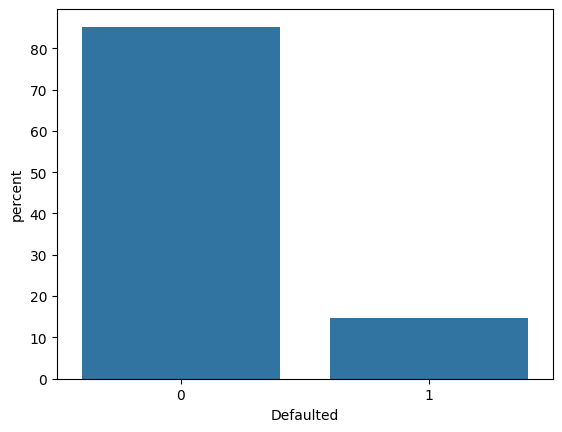

In [7]:
sns.countplot(data=df,x='Defaulted', stat='percent',)

In [8]:
df.columns

Index(['ListingCreationDate', 'Term', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'ListingCategory (numeric)', 'BorrowerState',
       'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner',
       'CurrentlyInGroup', 'DateCreditPulled', 'CreditScoreRangeLower',
       'CreditScoreRangeUpper', 'FirstRecordedCreditLine', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
       'DebtToIncomeRatio', 'IncomeRange', 'IncomeVerifiable',
       'StatedMonthlyIncome', 'LoanKey', 'LoanCurrentDaysDelinquent',
       'LoanMonthsSinceOrigination', 'Loa

In [9]:
len(df.columns)

57

0 Term


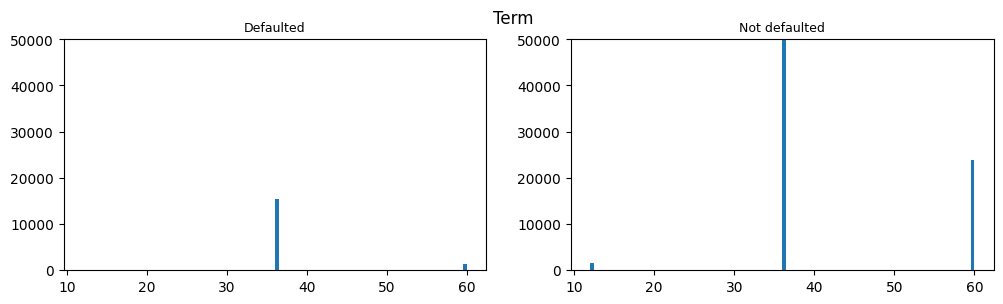

1 BorrowerAPR


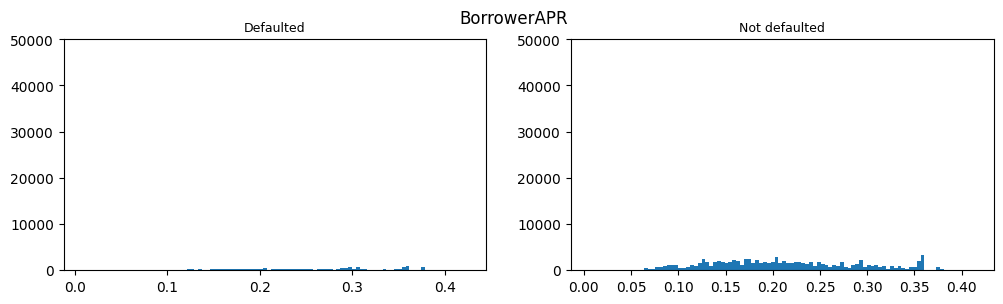

2 BorrowerRate


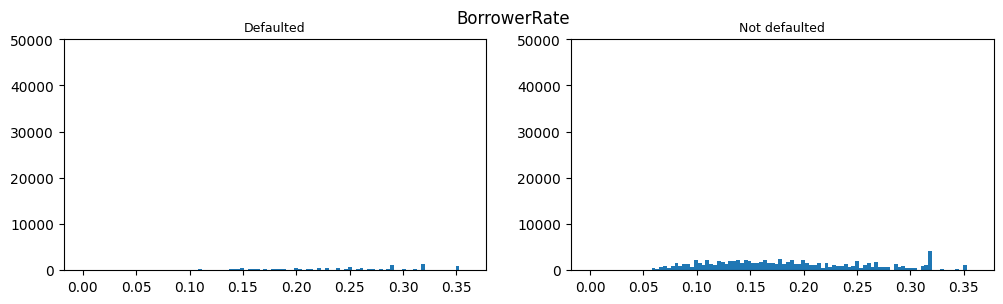

3 LenderYield


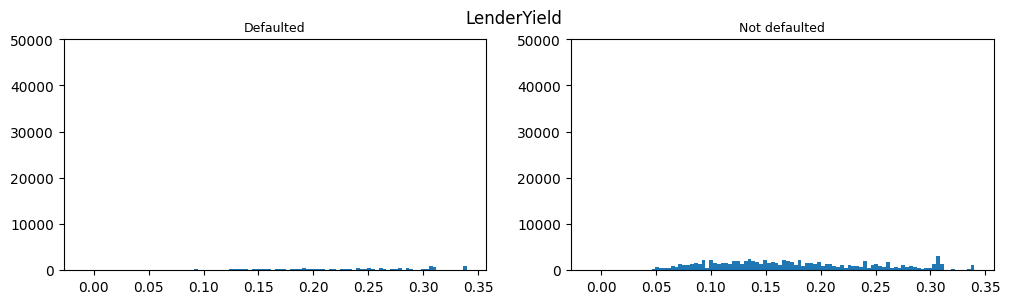

4 ListingCategory (numeric)


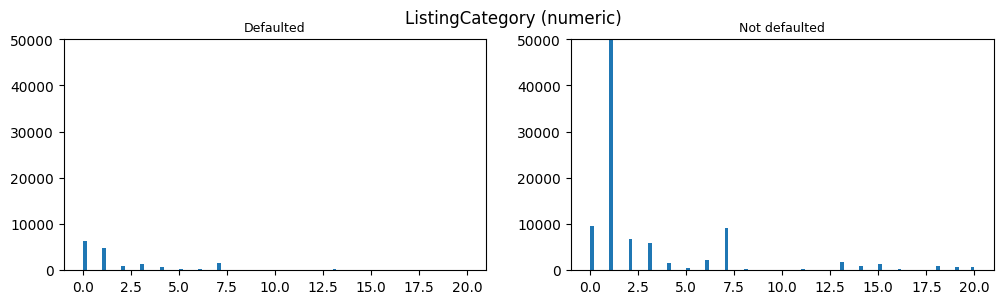

5 EmploymentStatusDuration


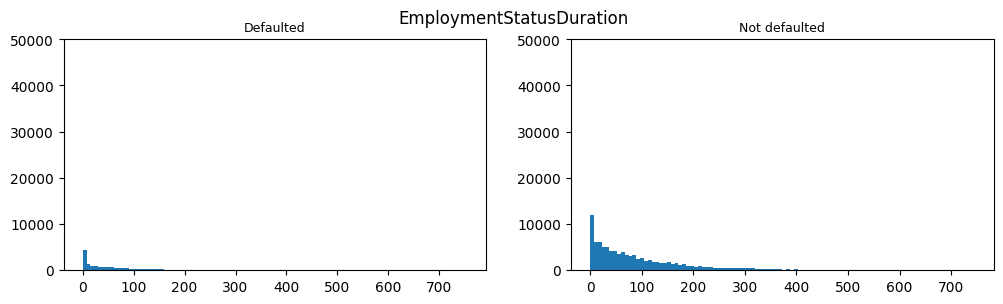

6 CreditScoreRangeLower


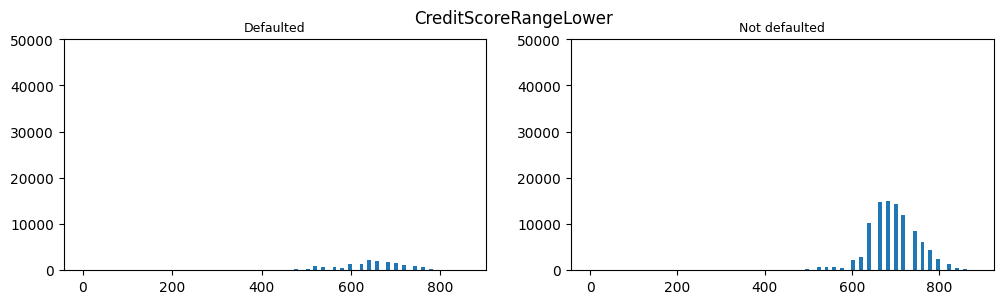

7 CreditScoreRangeUpper


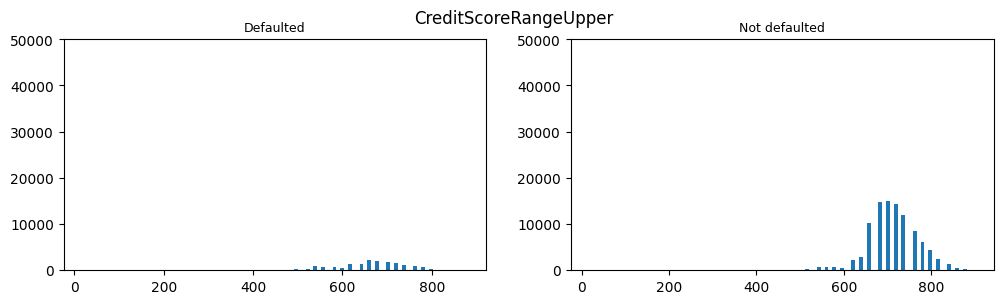

8 OpenCreditLines


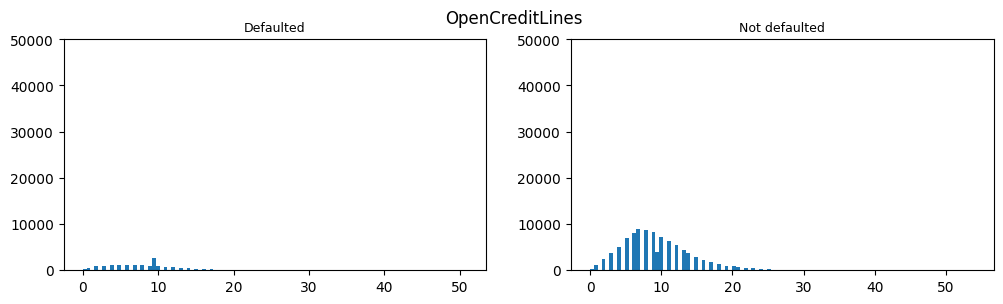

9 TotalCreditLinespast7years


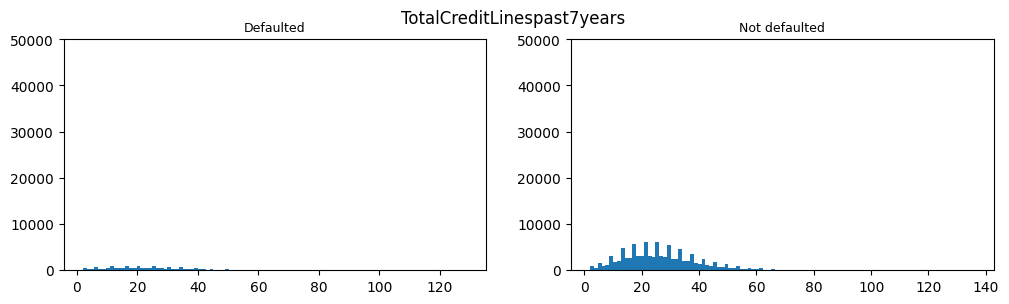

10 OpenRevolvingAccounts


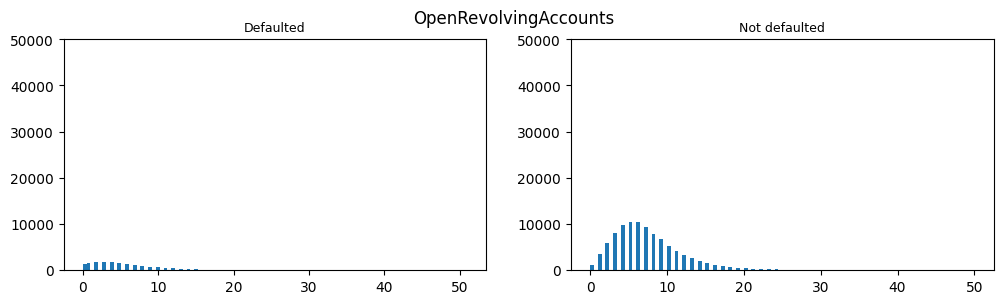

11 OpenRevolvingMonthlyPayment


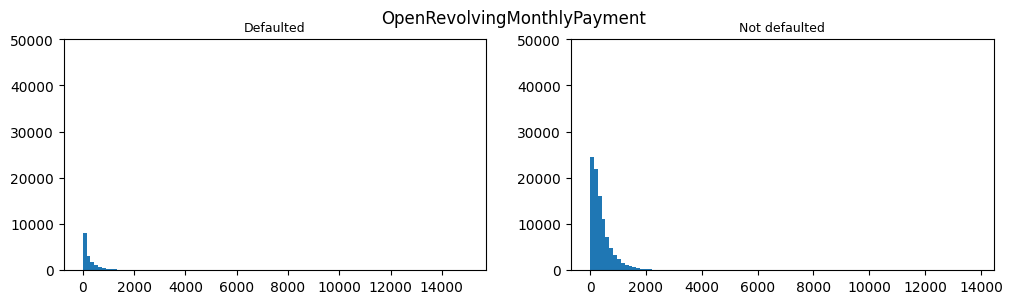

12 InquiriesLast6Months


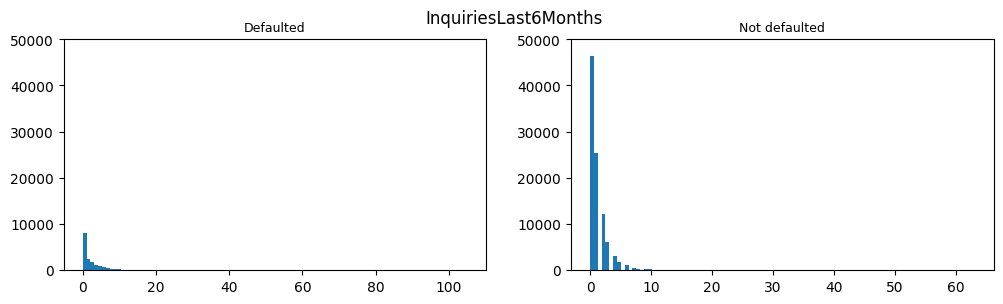

13 TotalInquiries


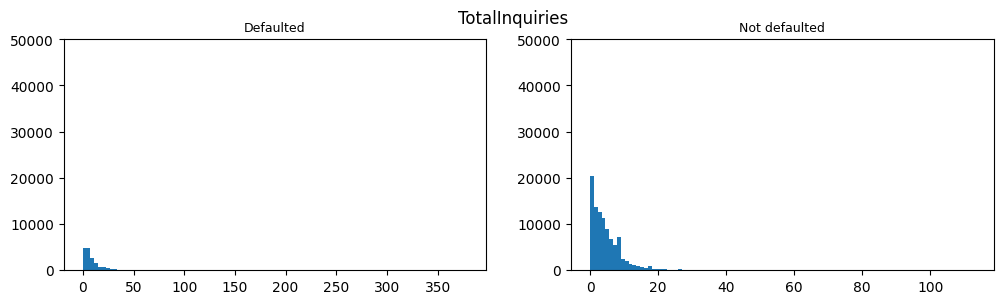

14 CurrentDelinquencies


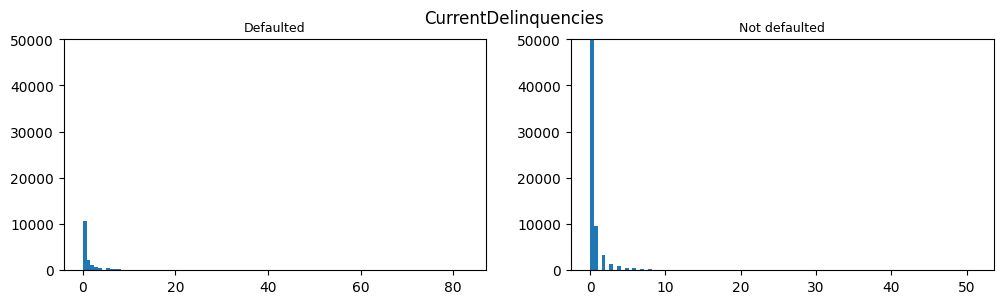

15 AmountDelinquent


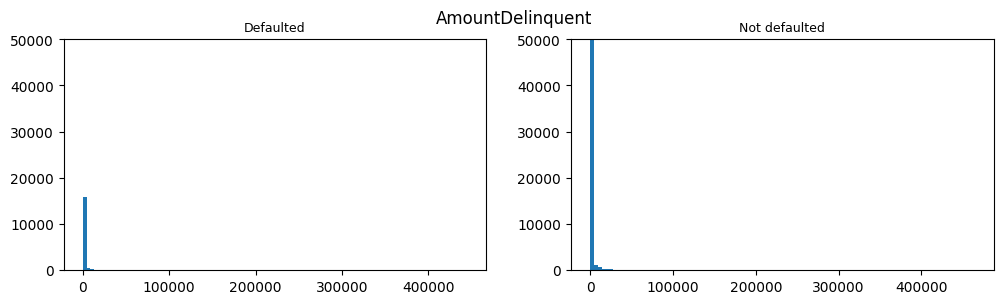

16 DelinquenciesLast7Years


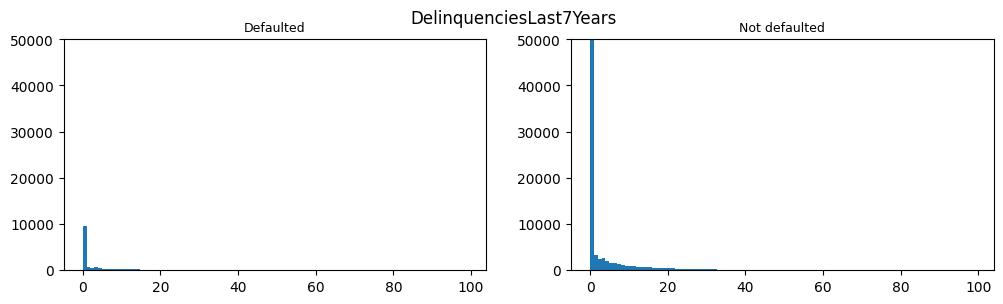

17 PublicRecordsLast10Years


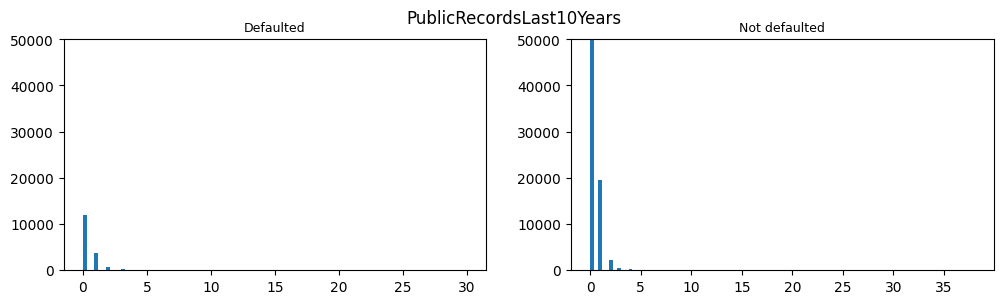

18 PublicRecordsLast12Months


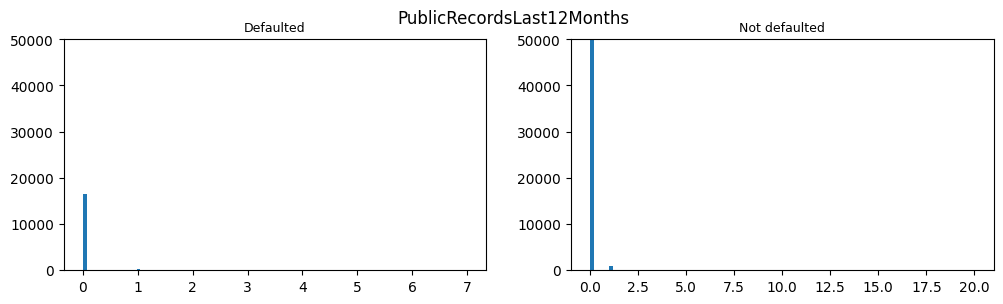

19 RevolvingCreditBalance


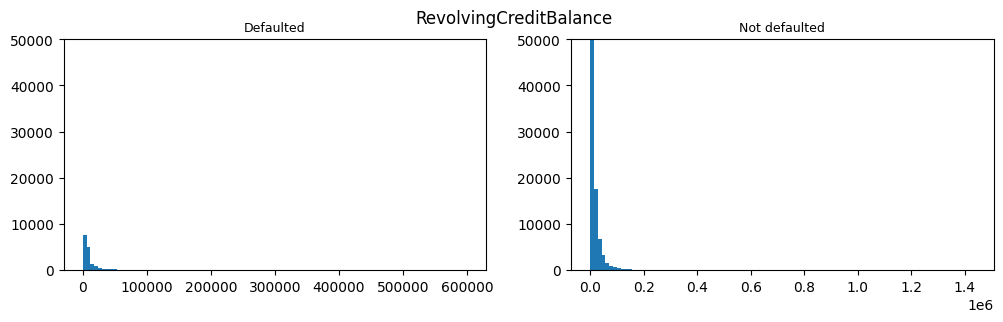

20 BankcardUtilization


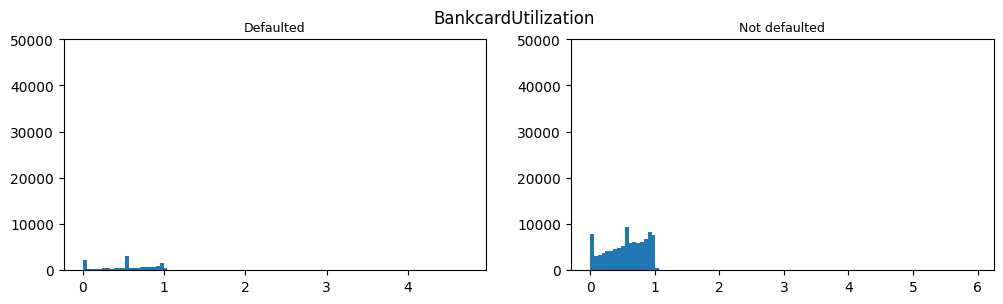

21 AvailableBankcardCredit


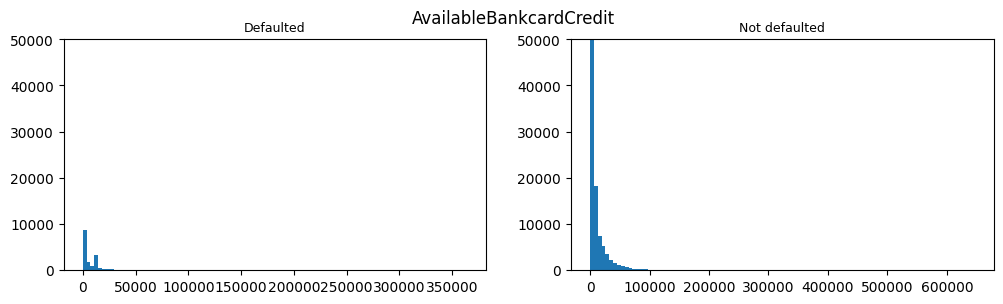

22 TotalTrades


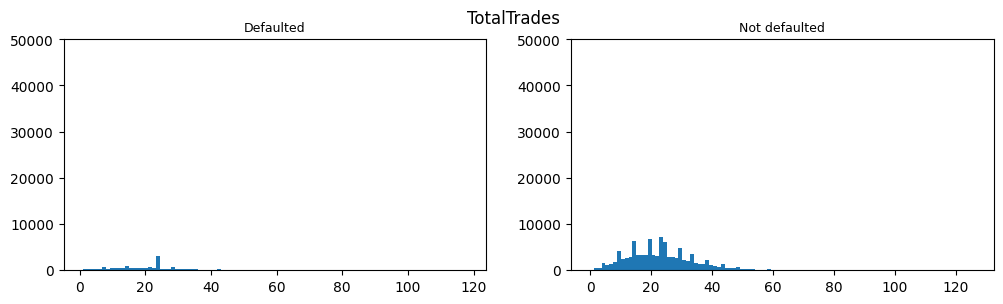

23 TradesNeverDelinquent (percentage)


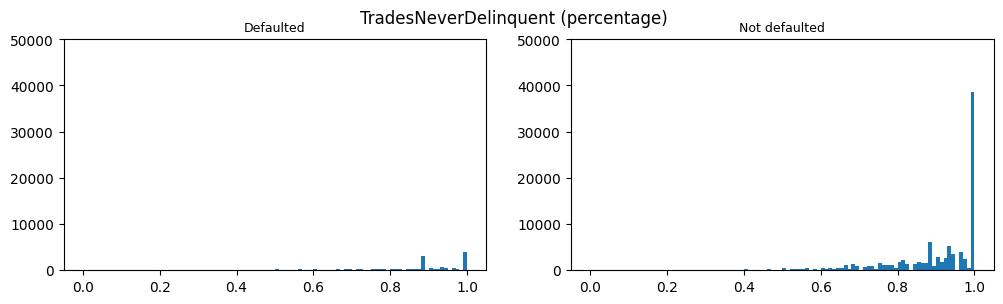

24 TradesOpenedLast6Months


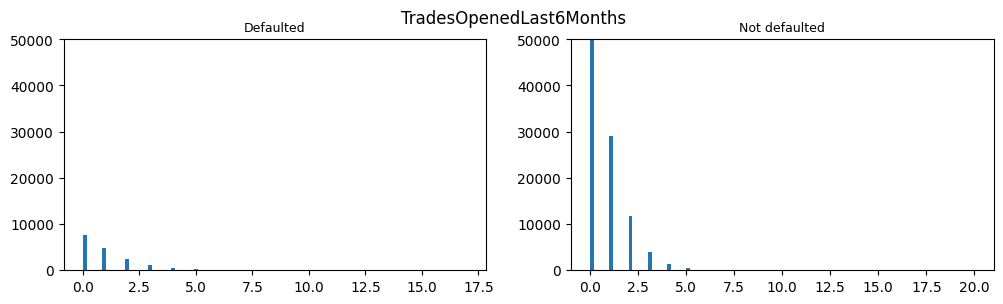

25 DebtToIncomeRatio


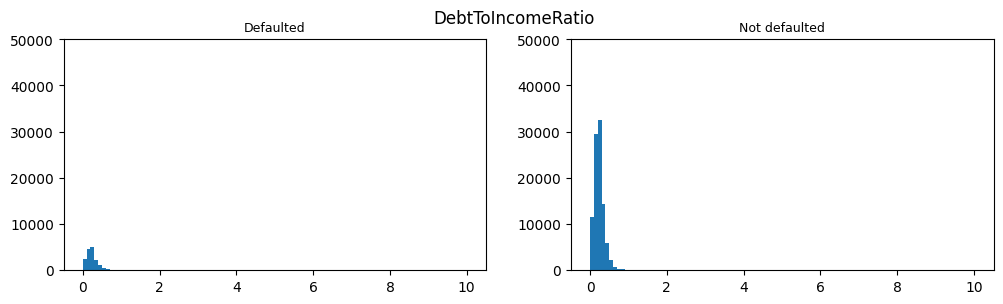

26 StatedMonthlyIncome


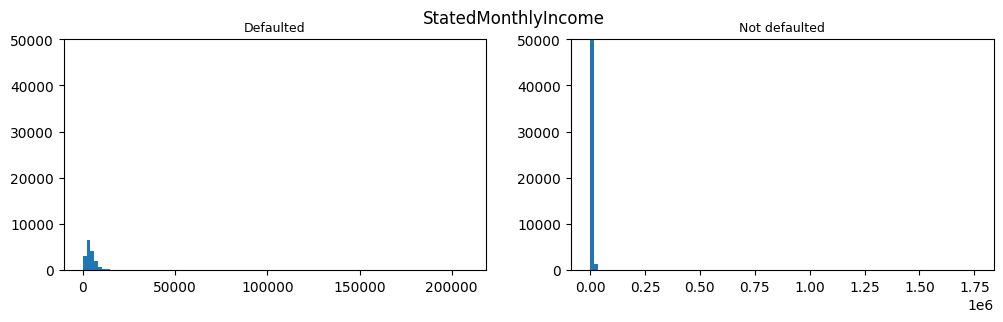

27 LoanCurrentDaysDelinquent


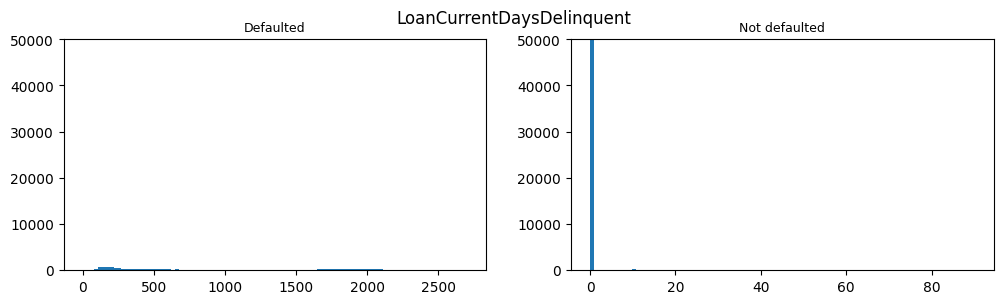

28 LoanMonthsSinceOrigination


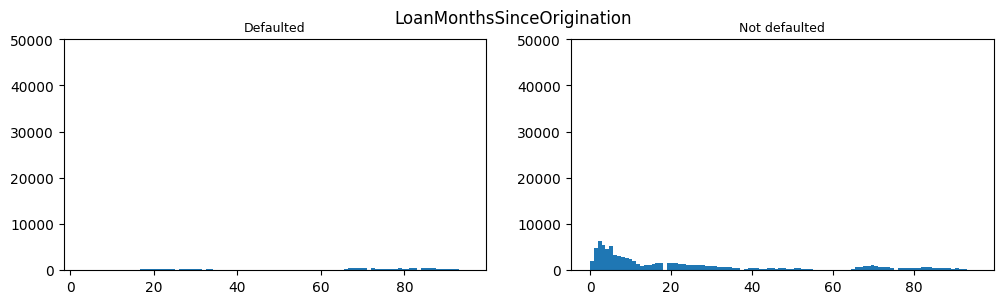

29 LoanOriginalAmount


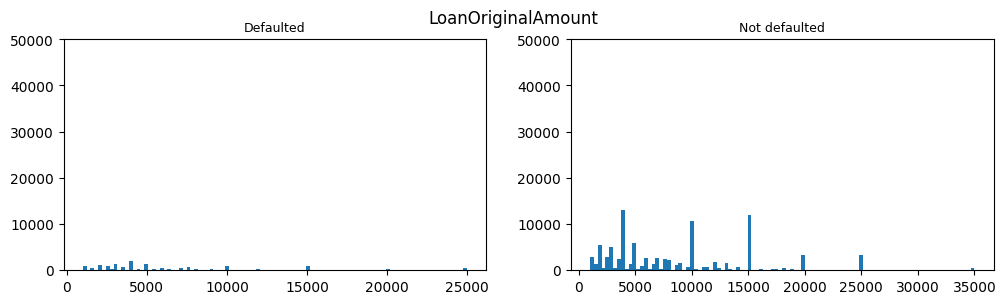

30 MonthlyLoanPayment


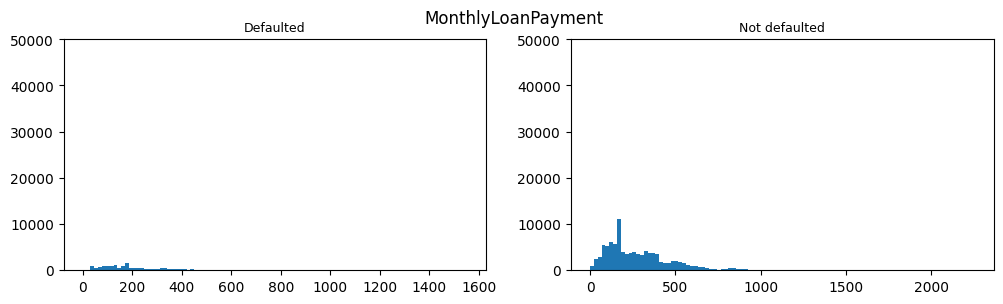

31 LP_CustomerPayments


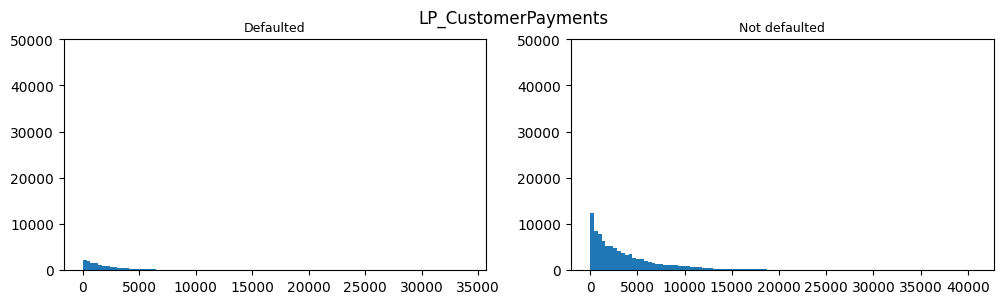

32 LP_CustomerPrincipalPayments


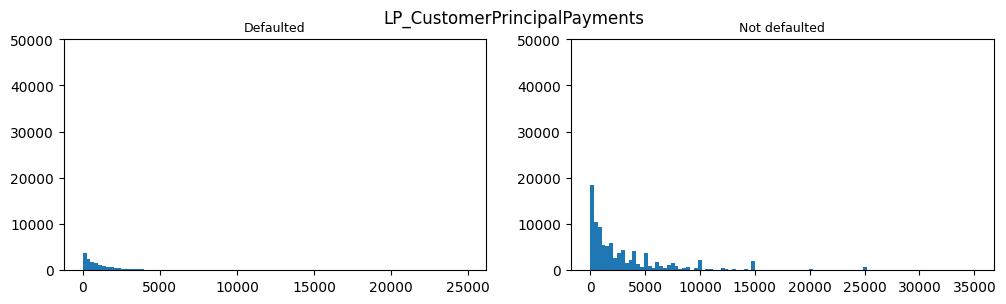

33 LP_InterestandFees


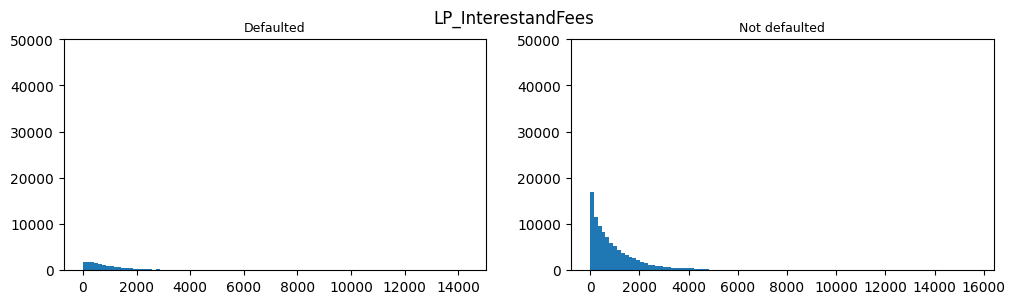

34 LP_ServiceFees


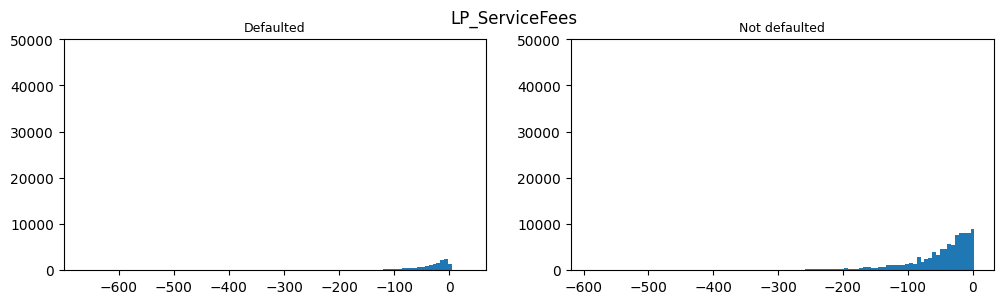

35 LP_CollectionFees


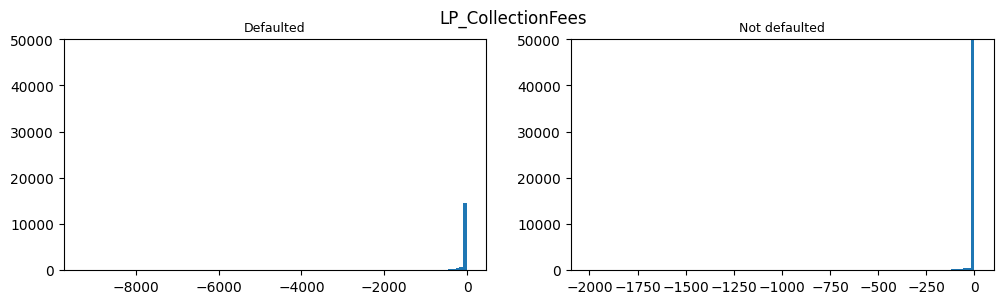

36 LP_GrossPrincipalLoss


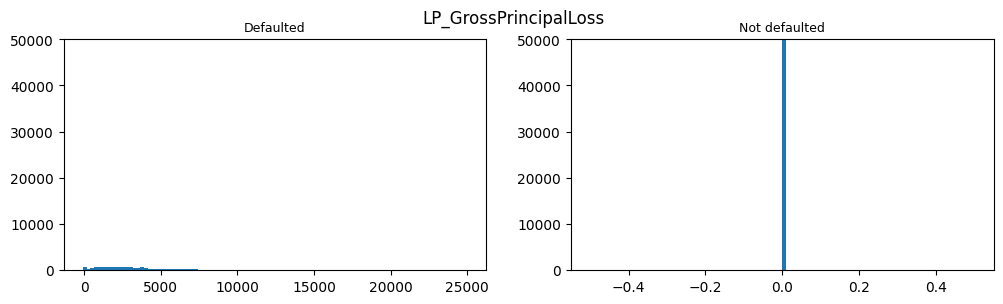

37 LP_NetPrincipalLoss


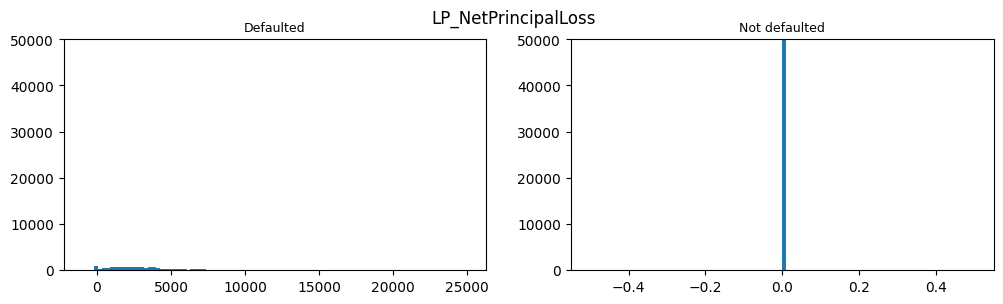

38 LP_NonPrincipalRecoverypayments


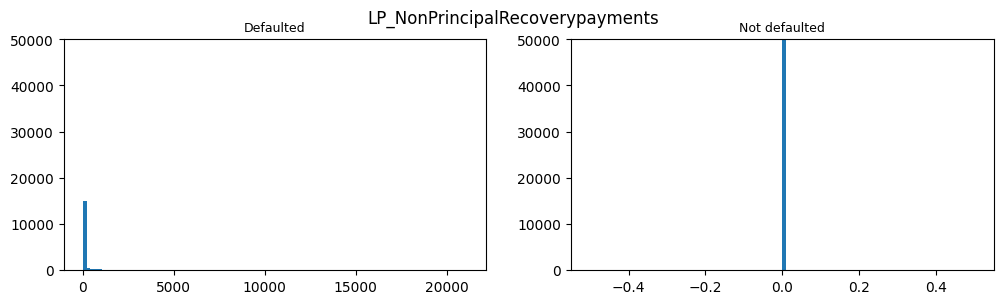

39 PercentFunded


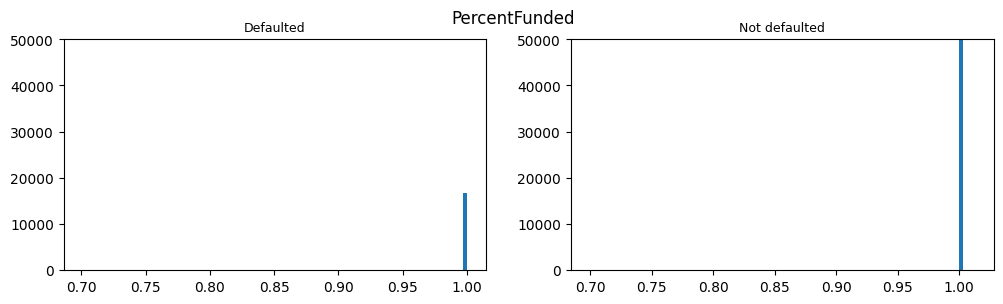

40 Recommendations


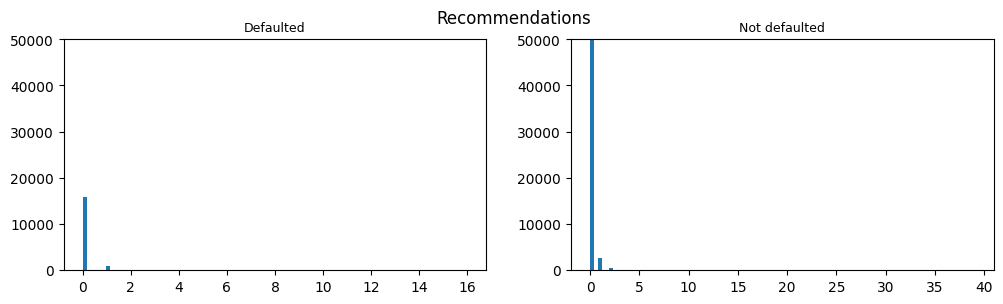

41 InvestmentFromFriendsCount


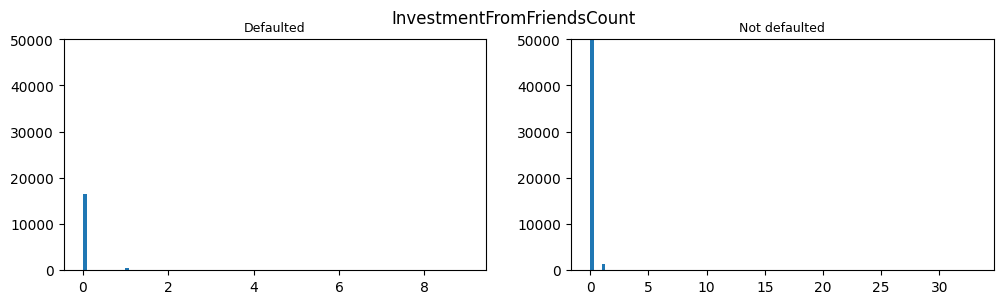

42 InvestmentFromFriendsAmount


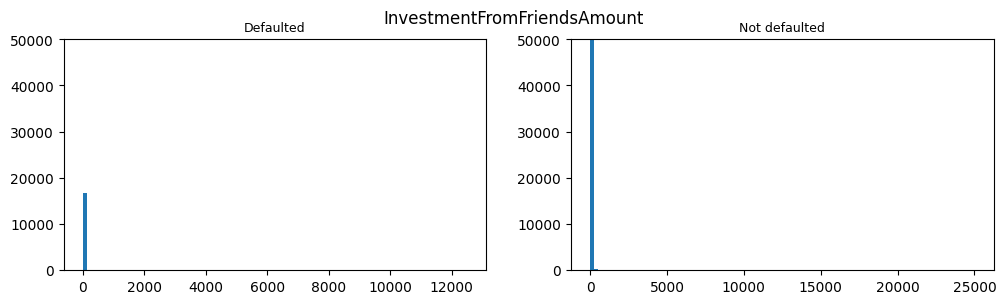

43 Investors


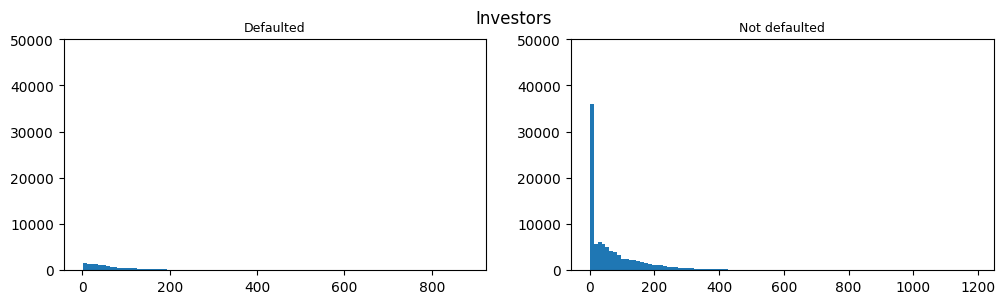

In [10]:
df_default = df[df['Defaulted']==1]
df_not_default = df[df['Defaulted']==0]

numeric_cols = df.select_dtypes(include='number').drop(columns='Defaulted').columns

for i, col in enumerate(numeric_cols):
    print(i, col)

    fig, axs = plt.subplots(1, 2, figsize=(12,3));

    axs[0].set_title('Defaulted', fontsize=9);
    axs[0].set_ylim([0,50000]);
    # axs[0].hist(x=df_default['DebtToIncomeRatio'], bins=100);
    axs[0].hist(x=df_default[col], bins=100);

    axs[1].set_title('Not defaulted', fontsize=9);
    axs[1].set_ylim([0,50000]);
    # axs[1].hist(x=df_not_default['DebtToIncomeRatio'], bins=100);
    axs[1].hist(x=df_not_default[col], bins=100);
    
    fig.suptitle(col);
    plt.show()




In [20]:
dataset = df
dataframe = dataset[numeric_cols]
dataframe["target"] = dataset.Defaulted
matrix = dataframe.corr();

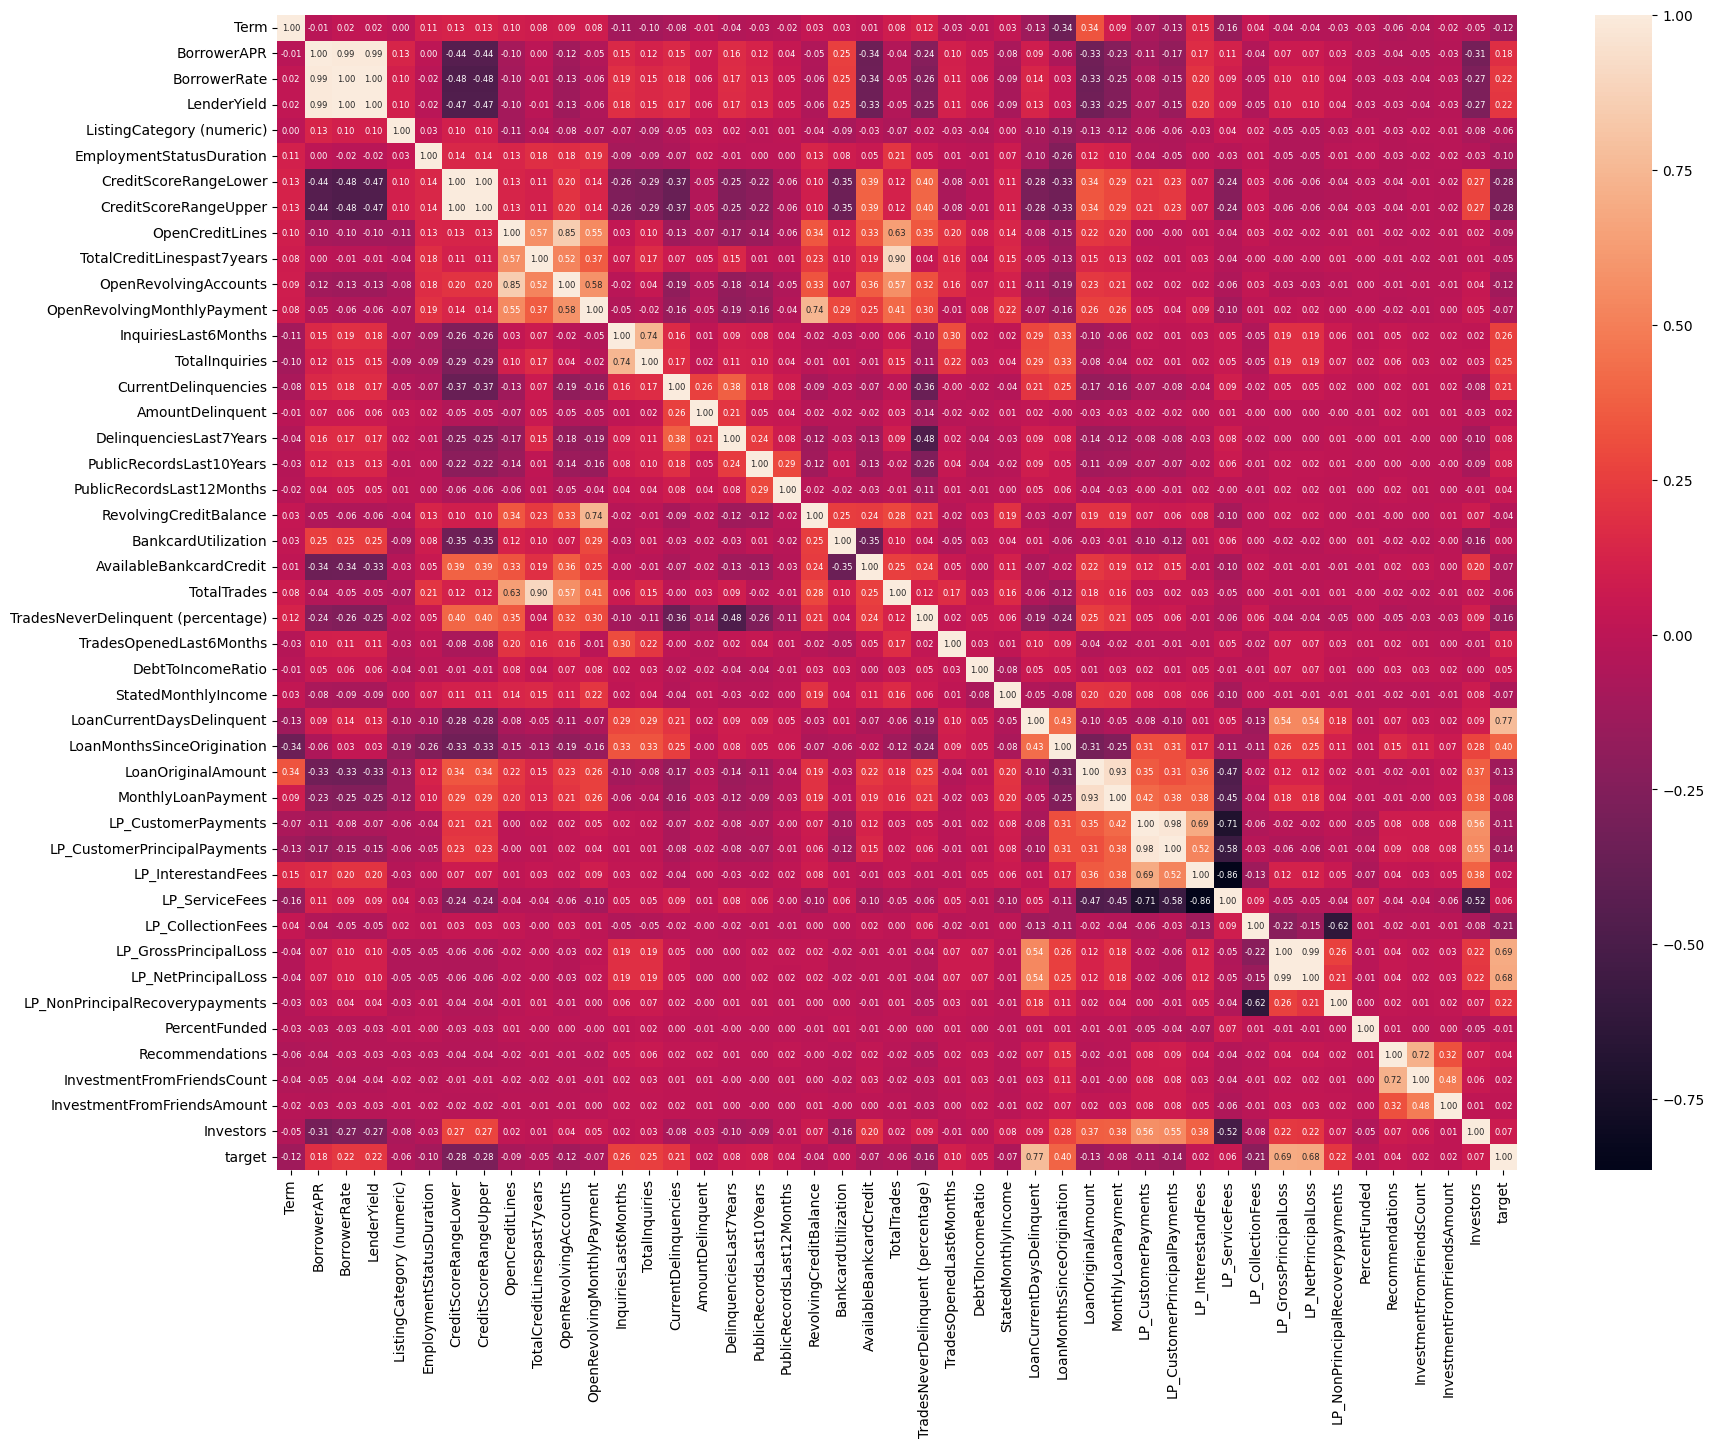

In [24]:
plt.figure(figsize=(20, 15))
# sns.heatmap(matrix, xticklabels=matrix.columns.values, yticklabels=matrix.columns.values, annot=False);
sns.heatmap(matrix, xticklabels=matrix.columns.values, yticklabels=matrix.columns.values, annot=True, fmt='.2f', annot_kws={"size":6});
plt.show()